 Data Info 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

 Missing Values 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embar

C:\Users\lenovo\AppData\Local\Temp\ipykernel_7028\323567778.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


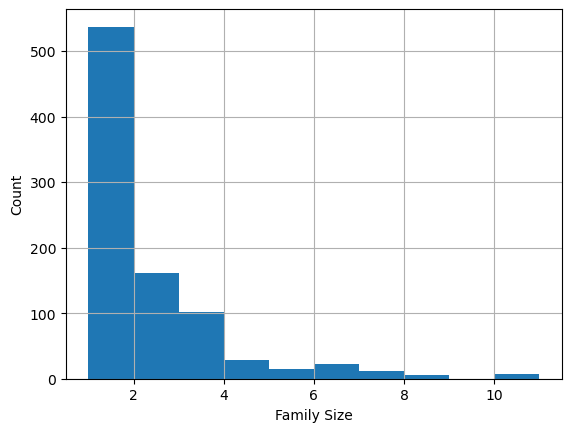

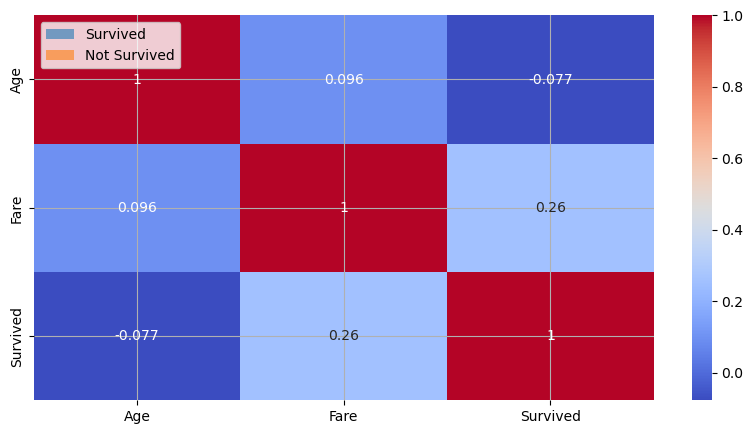

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("titanic.csv")
print(" Data Info ")
df.head()
df.info()
df.describe()
print("\n Missing Values ")
print(df.isnull().sum())


print("\n 1.Survival by Class")
survival_by_class = df.groupby("Pclass")["Survived"].mean()
print(survival_by_class)


print("\n 2.Survival by Gender")
survival_by_gender = df.groupby("Sex")["Survived"].mean()
print(survival_by_gender)
overall_survival = df["Survived"].mean()
print("Overall Survival Rate:", overall_survival)


print("\n 3.Cabin Analysis")
df["HasCabin"] = df["Cabin"].notna()
cabin_survival = df.groupby("HasCabin")["Survived"].mean()
print(cabin_survival)


print("\n 4.Family Size Impact")
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df["FamilySize"].corr(df["Survived"])
df["FamilySize"].hist(bins=10)
plt.xlabel("Family Size")
plt.ylabel("Count")


print("\n 5.Age Distribution")
plt.figure(figsize=(10,5))
df[df["Survived"] == 1]["Age"].hist(bins=30, alpha=0.6, label="Survived")
df[df["Survived"] == 0]["Age"].hist(bins=30, alpha=0.6, label="Not Survived")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Count")


print("\n 6.Embarkation Port")
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
embark_survival = df.groupby("Embarked")["Survived"].mean()
print(embark_survival)


print("\n 7.Ticket Prefix Survival")
df["TicketPrefix"] = df["Ticket"].str[0]
ticket_survival = df.groupby("TicketPrefix")["Survived"].mean()
print(ticket_survival)


print("\n 8.Fare Missing Values")
df["Fare"].isnull().sum()
df["Fare"] = df.groupby("Pclass")["Fare"].transform(
    lambda x: x.fillna(x.median())
)
print("Missing Fare values after:", df["Fare"].isnull().sum())
print(df[["Pclass", "Fare"]].head(10))


print("\n 9.Correlation Matrix")
corr = df[["Age", "Fare", "Survived"]].corr()
print(corr)
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [14]:
import pandas as pd

print("\n 10.Advanced Feature Engineering")

# Load Titanic dataset
df = pd.read_csv("titanic.csv")

# Create FamilySize
df["FamilySize"] = df["SibSp"] + df["Parch"]

# Create FamilyCategory
df["FamilyCategory"] = df["FamilySize"].apply(
    lambda x: "Solo" if x == 0 else ("Size_1" if x == 1 else "Size_2+")
)

# Group by FamilyCategory and calculate survival rate
result = df.groupby("FamilyCategory")["Survived"].agg(
    Count="count",
    SurvivalRate="mean"
)

# Print the result
print(result)


 10.Advanced Feature Engineering
                Count  SurvivalRate
FamilyCategory                     
Size_1            161      0.552795
Size_2+           193      0.466321
Solo              537      0.303538
